In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [5]:
X = iris.data[:,:2]
y = iris.target
T = []
u = []
for i in range(len(X)):
    if y[i] == 0 or y[i] == 1:
        T.append(X[i])
        u.append(y[i])

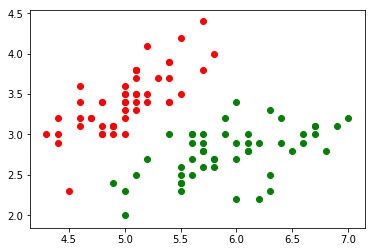

In [6]:
class1 = X[y==0]
class2 = X[y==1]
class3 = X[y==2]
plt.scatter(class1[:,0],class1[:,1], color = 'red')
plt.scatter(class2[:,0],class2[:,1], color = 'green')
plt.show()

In [7]:
class KMeans:
    def __init__(self,num_classes,num_epochs):
        self.num_classes = num_classes
        self.num_epochs = num_epochs
        
    def metric(self,point1,point2):
        """Euclidean metric"""
        if len(point1) != len(point2):
            print("Error, points are of different lengths")
        else:
            return np.power(np.sum(np.power(point1-point2,2)),0.5)
        
    def cluster(self,xdata,cluster_points):
        """Clusters data points to nearest cluster points"""
        clusters = np.zeros(len(xdata))
        for k in range(len(xdata)):
            distance = np.zeros(len(cluster_points))
            for i in range(len(cluster_points)):
                distance[i] = self.metric(xdata[k],cluster_points[i])
            
            clusters[k] = np.where(distance == np.min(distance))[0][0]
        
        return clusters 
    
    def fit(self,xdata):
        cluster_points = np.random.random((self.num_classes, len(xdata[0])))
        print (cluster_points)
        classification = self.cluster(xdata,cluster_points)
        for k in range(self.num_epochs):
            for i in range(len(cluster_points)):
                cluster_points[i] = np.zeros(len(xdata[0]))
                count = 0
                for j in range(len(classification)):
                    if i == classification[j]:
                        cluster_points[i] += xdata[j]
                        count += 1
                if count != 0:
                    cluster_points[i] / count
            print (cluster_points)
            classification = self.cluster(xdata,cluster_points)
            print (classification)
        
        return classification

In [8]:
KM = KMeans(2,10)
classification = KM.fit(T)
print (classification)

[[ 0.79780924  0.89495406]
 [ 0.41742813  0.86115493]]
[[ 547.1  309.4]
 [   0.     0. ]]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[[   0.     0. ]
 [ 547.1  309.4]]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[[ 547.1  309.4]
 [   0.     0. ]]
[ 1.  1.  1.  1.  1.  1.  